<a href="https://colab.research.google.com/github/itishajain15/Skill_Parser/blob/main/Skill_Parser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# Importing the required libraries
import numpy as np
import pandas as pd
import csv

!pip install nltk
import nltk
nltk.download('punkt')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [82]:
import spacy
from spacy.matcher import Matcher
import re
nltk.download('stopwords')


# reading raw_skills_csv file
raw = open("/content/Raw_Skills_Dataset.csv", "r")
  
# joining with space content of text
raw = ' '.join([i for i in raw])  
  
# replacing ',' by space
raw = raw.replace(",", " ")  
raw =raw.replace("/"," ")
raw =raw.lower()


# reading Example_Technical_Skills file
technical = open("/content/Example_Technical_Skills.csv", "r")
  
# joining with space content of text
technical = ' '.join([i for i in technical])  
  
# replacing ',' by space
technical = technical.replace(",", " ")  
technical =technical.lower()

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

# initialize matcher with a vocab
matcher = Matcher(nlp.vocab)

def extract_details(text):
    import pandas as pd
    # removing stop words and implementing word tokenization
    stop_words = set(nltk.corpus.stopwords.words('english'))
    word_tokens = nltk.tokenize.word_tokenize(text)
    
    # remove the stop words
    filtered_tokens = [w for w in word_tokens if w not in stop_words]
 
    # remove the punctuation
    filtered_tokens = [w for w in word_tokens if w.isalpha()]
 
    # generate bigrams and trigrams (such as artificial intelligence)
    bigrams_trigrams = list(map(' '.join, nltk.everygrams(filtered_tokens, 2, 3)))
    
    # we create a set to keep the results in.
    skillset = set()
 
    # we search for each token in our skills database
    for token in filtered_tokens:
        if token.lower() in technical:
            skillset.add(token)

    # we search for each bigram and trigram in our skills database
    for ngram in bigrams_trigrams:
        if ngram.lower() in technical:
            skillset.add(ngram)

    return skillset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
#extracting skills from the raw_skills_dataset
skills= extract_details(raw)


In [85]:
skills

{'kubernetes service',
 'city',
 'min',
 'delivery',
 'nextgen',
 'application integration',
 'high',
 'perform',
 'as',
 'ble',
 'signal',
 'certified',
 'ux',
 'protocol',
 'transportation',
 'mil',
 'privileged',
 'person',
 'modules',
 'soc',
 'beans',
 'vms',
 'ledger',
 'r',
 'repository',
 'a cloud',
 'rsa',
 'processor',
 'agile',
 'magento',
 'cpi',
 'national',
 'legacy',
 'other',
 'outs',
 'ni',
 'fix',
 'poc',
 'foundations',
 'risk management',
 'a strategic',
 'sql data warehouse',
 'action',
 'rmi',
 'repos',
 'integration',
 'decision',
 'wi',
 'ra',
 'dev ops',
 'sap successfactors',
 'siem',
 'escalations',
 'cycle management',
 'technical',
 'old',
 'acf',
 'dev',
 'monitoring',
 'workday',
 'networking',
 'prevention',
 'idea',
 'epos',
 'best',
 'res',
 'seo',
 'job',
 'ecommerce',
 'testing',
 'datastore',
 'dr',
 'ado',
 'force',
 'lake',
 'factors',
 'form',
 'centricity',
 'module',
 'science',
 'ordination',
 'now',
 'database',
 'medical',
 'one',
 'distribu

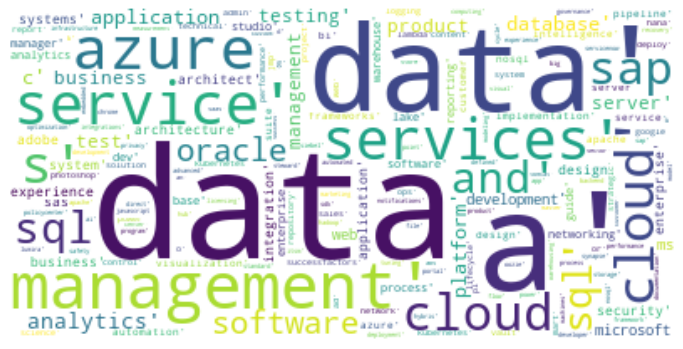

In [86]:
#word cloud imports
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#changing datatype
skills=str(skills)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="White").generate(skills)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()